# Analyzing Factors Affecting Mental Health and Well-Being in Canadian Adults

# Exploration Data Analysis

Load the Dataset.
Basic Information and Summary Statistics.
Distribution of Key Variables.
Correlation Analysis.
Visualizations.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')
data.head()

,GEN_005,GEN_015,GEN_020,GEN_025,GENDVHDI,GENDVMHI,GEN_010,GEN_030,ALC_015,ALC_020,...,ALW_005,ALWDVWKY,ALWDVDLY,ALWDVLTR,ALWDVSTR,DRGDVYA,DHH_SEX,DHHGAGE,DHHGMS,DHHDGHSZ
0,3.0,3.0,2.0,2.0,2.0,2.0,9.0,2.0,5.0,3.0,...,6.0,996.0,996.0,6.0,6.0,2.0,2.0,3.0,1.0,2.0
1,3.0,2.0,4.0,6.0,2.0,3.0,7.0,2.0,3.0,1.0,...,1.0,2.0,0.0,2.0,2.0,6.0,2.0,5.0,1.0,2.0
2,2.0,2.0,3.0,2.0,3.0,3.0,10.0,1.0,5.0,1.0,...,1.0,4.0,1.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0
3,1.0,1.0,1.0,6.0,4.0,4.0,10.0,1.0,4.0,2.0,...,6.0,996.0,996.0,6.0,6.0,6.0,1.0,5.0,1.0,2.0
4,1.0,2.0,1.0,6.0,4.0,3.0,10.0,1.0,1.0,1.0,...,2.0,0.0,0.0,2.0,2.0,6.0,2.0,5.0,2.0,1.0


In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28034 entries, 0 to 28033
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GEN_005   28034 non-null  float64
 1   GEN_015   28034 non-null  float64
 2   GEN_020   28034 non-null  float64
 3   GEN_025   28034 non-null  float64
 4   GENDVHDI  28034 non-null  float64
 5   GENDVMHI  28034 non-null  float64
 6   GEN_010   28034 non-null  float64
 7   GEN_030   28034 non-null  float64
 8   ALC_015   28034 non-null  float64
 9   ALC_020   28034 non-null  float64
 10  DOALW     28034 non-null  float64
 11  ALW_005   28034 non-null  float64
 12  ALWDVWKY  28034 non-null  float64
 13  ALWDVDLY  28034 non-null  float64
 14  ALWDVLTR  28034 non-null  float64
 15  ALWDVSTR  28034 non-null  float64
 16  DRGDVYA   28034 non-null  float64
 17  DHH_SEX   28034 non-null  float64
 18  DHHGAGE   28034 non-null  float64
 19  DHHGMS    28034 non-null  float64
 20  DHHDGHSZ  28034 non-null  fl

In [4]:
data_description = data.describe(include='all')

data_description

,GEN_005,GEN_015,GEN_020,GEN_025,GENDVHDI,GENDVMHI,GEN_010,GEN_030,ALC_015,ALC_020,...,ALW_005,ALWDVWKY,ALWDVDLY,ALWDVLTR,ALWDVSTR,DRGDVYA,DHH_SEX,DHHGAGE,DHHGMS,DHHDGHSZ
count,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,...,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000,28034.000000
mean,2.133623,1.897696,2.488122,4.489227,2.866377,3.102304,8.415103,2.037883,3.676108,1.757865,...,3.926339,561.345830,559.950560,4.211850,4.232289,4.504744,1.528501,3.955376,1.340979,1.743989
std,0.875707,0.811851,0.933843,1.697185,0.875707,0.811851,1.275242,0.772844,1.934310,1.178415,...,2.328243,492.393016,493.957742,2.114637,2.088159,1.940284,0.499196,1.080487,0.474047,0.436436
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,8.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,2.000000,2.000000,3.000000,6.000000,3.000000,3.000000,8.000000,2.000000,4.000000,1.000000,...,6.000000,996.000000,996.000000,6.000000,6.000000,6.000000,2.000000,4.000000,1.000000,2.000000
75%,3.000000,2.000000,3.000000,6.000000,4.000000,4.000000,9.000000,2.000000,5.000000,2.000000,...,6.000000,996.000000,996.000000,6.000000,6.000000,6.000000,2.000000,5.000000,2.000000,2.000000
max,4.000000,5.000000,4.000000,9.000000,4.000000,4.000000,10.000000,4.000000,7.000000,6.000000,...,7.000000,999.000000,999.000000,9.000000,9.000000,9.000000,2.000000,5.000000,2.000000,2.000000


### Visualize the distribution of perceived mental health

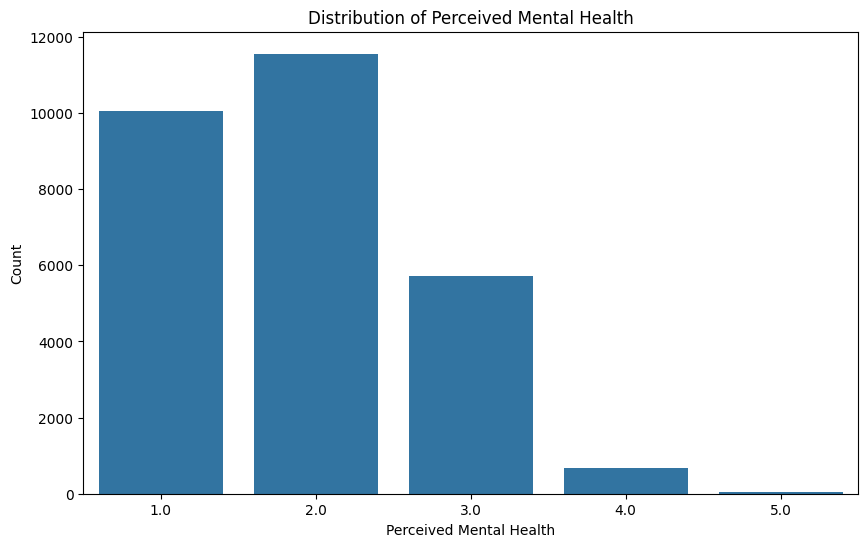

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GEN_015', data=data)
plt.title('Distribution of Perceived Mental Health')
plt.xlabel('Perceived Mental Health')
plt.ylabel('Count')
plt.show()

###  Visualize the correlation matrix

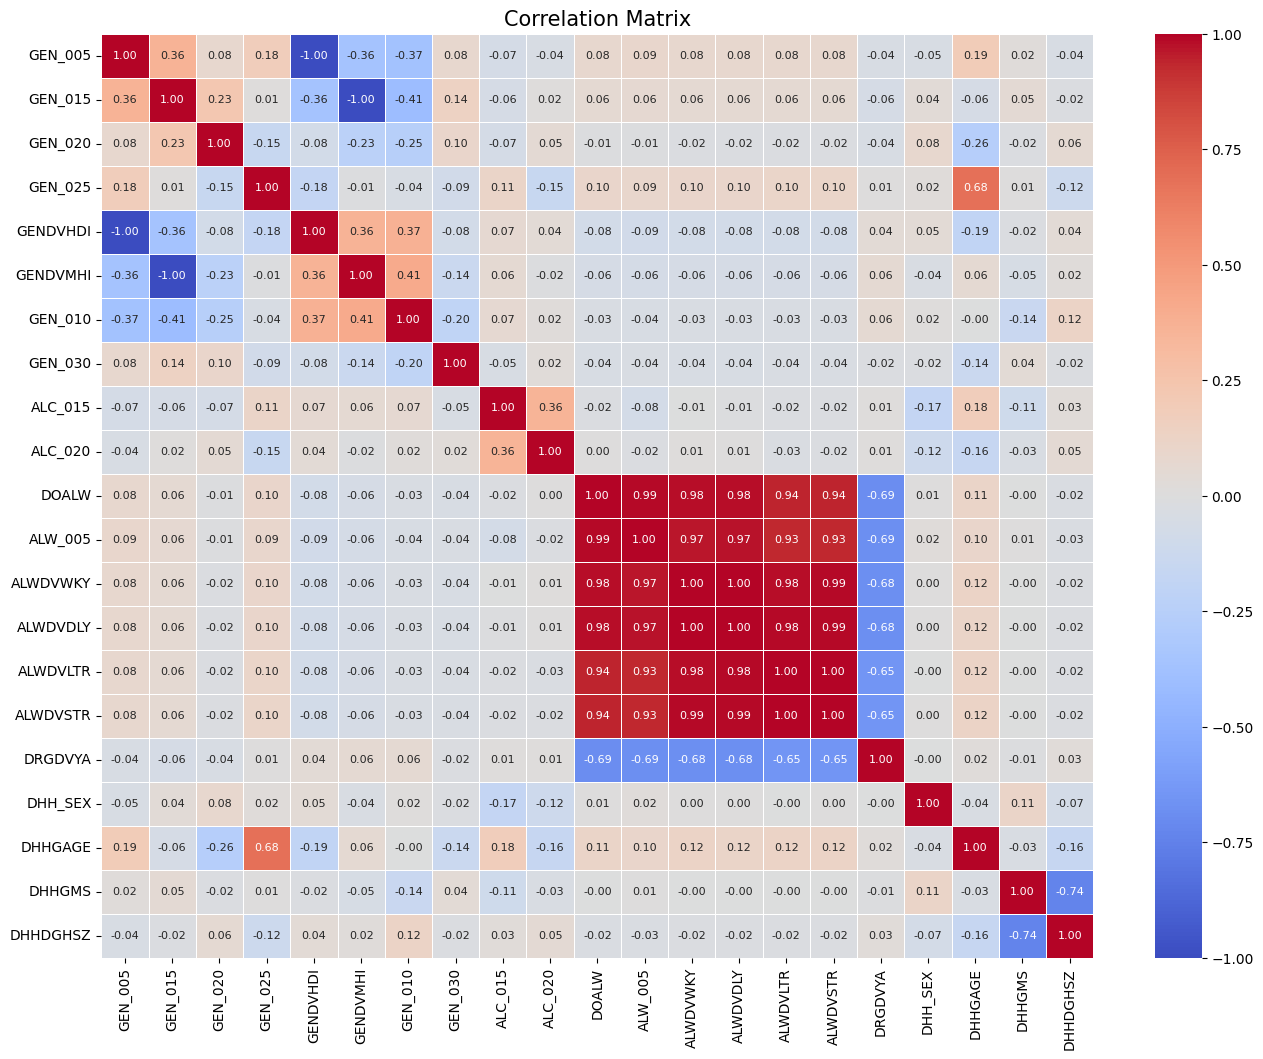

In [6]:
# Plot the correlation matrix with enhanced clarity
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Visualize the relationship between perceived mental health and life stress

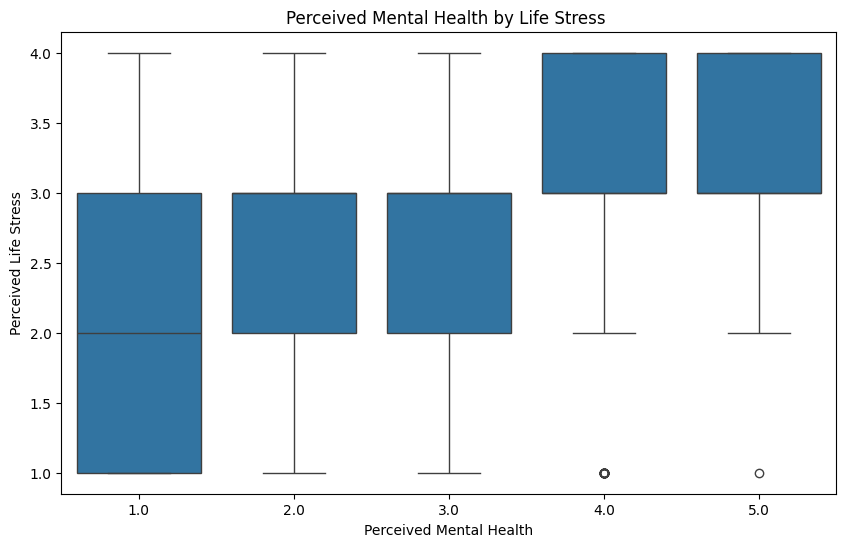

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GEN_015', y='GEN_020', data=data)
plt.title('Perceived Mental Health by Life Stress ')
plt.xlabel('Perceived Mental Health')
plt.ylabel('Perceived Life Stress')
plt.show()

### Analyze the impact of age on perceived mental health

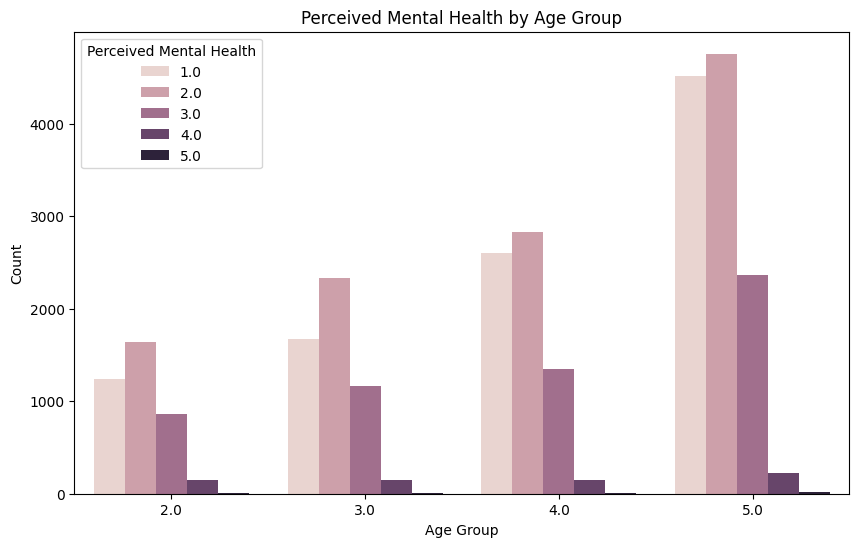

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DHHGAGE', hue='GEN_015', data=data)
plt.title('Perceived Mental Health by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Perceived Mental Health')
plt.show()

### Visualize the relationship between alcohol use and mental health

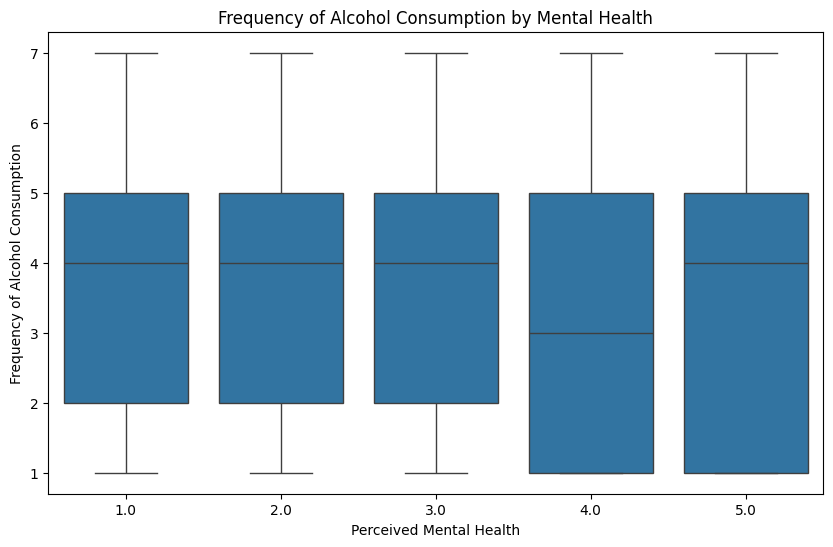

In [9]:
# Check for necessary columns
if 'GEN_015' not in data.columns or 'ALC_015' not in data.columns:
    print("Columns 'GEN_015' and 'ALC_015' are required for this visualization.")
else:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GEN_015', y='ALC_015', data=data)
    plt.title('Frequency of Alcohol Consumption by Mental Health')
    plt.xlabel('Perceived Mental Health')
    plt.ylabel('Frequency of Alcohol Consumption')
    plt.show()

### Visualize the relationship between health disorder and mental health

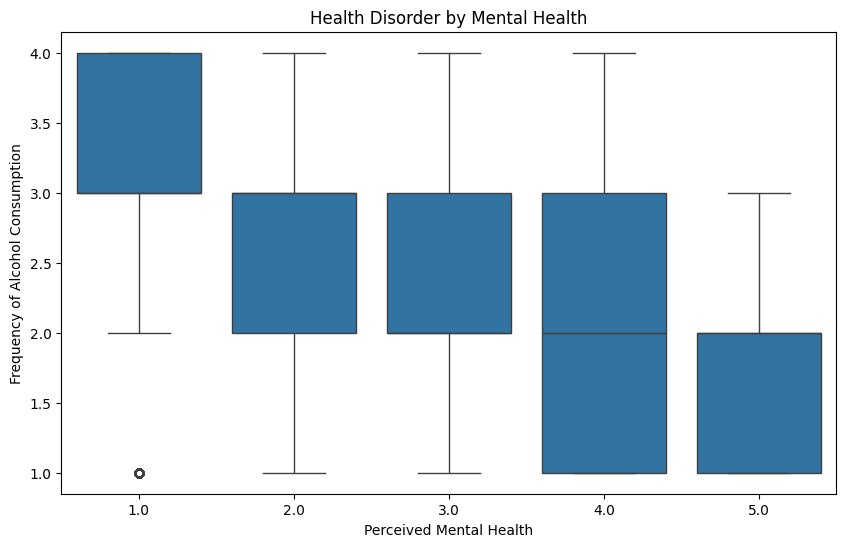

In [10]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='GEN_015', y='GENDVHDI', data=data)
    plt.title('Health Disorder by Mental Health')
    plt.xlabel('Perceived Mental Health')
    plt.ylabel('Frequency of Alcohol Consumption')
    plt.show()

## Neural Network

## Feature selection

In [11]:
features = data.drop(['GENDVMHI'], axis=1)  # Drop the target column - GENDVMHI: Indicator for mental health issues
target = data['GENDVMHI']  # Mental health issue indicator

In [12]:
# Print unique values in the target to understand its current encoding
print("Unique values in target before transformation:", target.unique())

Unique values in target before transformation: [2. 3. 4. 1. 0.]


## One-hot encode

In [15]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
target_encoded = encoder.fit_transform(target.values.reshape(-1, 1))

# Verify the shape of target_encoded
print("Shape of target_encoded:", target_encoded.shape)

Shape of target_encoded: (28034, 5)


## Data Preprocessing - Normalization/Standardization

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Data normalization/standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check for any extreme values in features
print("Feature statistics after scaling:")
print(pd.DataFrame(features_scaled).describe())

Feature statistics after scaling:
                 0             1             2             3             4   \
count  2.803400e+04  2.803400e+04  2.803400e+04  2.803400e+04  2.803400e+04   
mean  -1.670919e-16 -1.252080e-16  1.591713e-16  7.096810e-17  1.670919e-16   
std    1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00   
min   -1.294547e+00 -1.105760e+00 -1.593574e+00 -2.055928e+00 -2.131319e+00   
25%   -1.294547e+00 -1.105760e+00 -5.227112e-01 -8.774850e-01 -9.893633e-01   
50%   -1.525920e-01  1.260160e-01  5.481515e-01  8.901799e-01  1.525920e-01   
75%    9.893633e-01  1.260160e-01  5.481515e-01  8.901799e-01  1.294547e+00   
max    2.131319e+00  3.821343e+00  1.619014e+00  2.657845e+00  1.294547e+00   

                 5             6             7             8             9   \
count  2.803400e+04  2.803400e+04  2.803400e+04  2.803400e+04  2.803400e+04   
mean  -6.485977e-16 -2.417984e-16 -2.711995e-17 -8.110640e-17  8.262714e-17   
std    1.000018e+

## Split the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)
# # Ensure y_train is in the correct format
# y_train = y_train.values
# Print the shapes of the datasets to debug
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22427, 20)
Shape of X_test: (5607, 20)
Shape of y_train: (22427, 5)
Shape of y_test: (5607, 5)


In [17]:
# Ensure y_train and y_test are in the correct shape
y_train = np.array(y_train)
y_test = np.array(y_test)

## Class distribution

In [18]:
# Check for class distribution
print("Class distribution in y_train:", np.sum(y_train, axis=0))
print("Class distribution in y_test:", np.sum(y_test, axis=0))

Class distribution in y_train: [  30.  538. 4601. 9283. 7975.]
Class distribution in y_test: [   7.  128. 1130. 2275. 2067.]


## Multi-layer perceptron - Neural Network 

In [19]:
# model = Sequential()
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))  # dropout for regularization
# model.add(Dense(y_train.shape[1], activation='softmax'))

# # Compile the model with a learning rate of 0.01
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Fit the model with early stopping
# epochs = 100
# history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
class_weights_dict = dict(enumerate(class_weights))

# Print the computed class weights
print("Computed class weights:", class_weights_dict)

# Define the model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping], class_weight=class_weights_dict, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Computed class weights: {0: 151.53513513513514, 1: 8.418618618618618, 2: 0.9783283894608271, 3: 0.4851012285862606, 4: 0.558334993029277}
Epoch 1/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3378 - loss: 2.0106 - val_accuracy: 0.6324 - val_loss: 0.9377
Epoch 2/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5212 - loss: 1.1952 - val_accuracy: 0.8326 - val_loss: 0.6688
Epoch 3/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6478 - loss: 0.9624 - val_accuracy: 0.9001 - val_loss: 0.4724
Epoch 4/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7385 - loss: 0.8152 - val_accuracy: 0.9309 - val_loss: 0.3596
Epoch 5/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7560 - loss: 0.8744 - val_accuracy: 0.9666 - val_loss: 0.2933
Epoch 6/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7913 - loss: 0.6846 - val_accuracy: 0.9541 - val_loss: 0.2787
Epoch 7/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8059 - loss: 0.6491 -

##  Plot learning curves

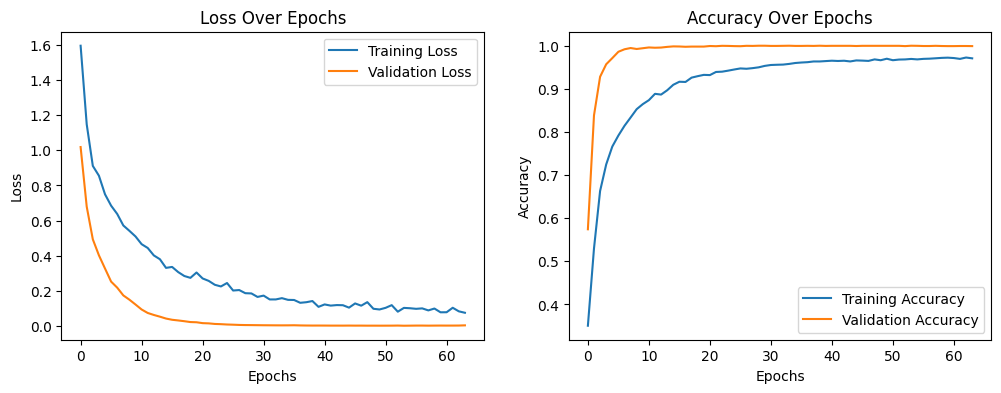

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

## Summary

### Loss Over Epochs:

Training Loss (Blue Line): The training loss decreases rapidly and approaches zero, indicating that the model is learning from the training data effectively.

Validation Loss (Orange Line): The validation loss also decreases and remains very close to the training loss, indicating that the model generalizes well to the validation data and is not overfitting.

### Accuracy Over Epochs:

Training Accuracy (Blue Line): The training accuracy increases rapidly and reaches 1.0 (100%), indicating that the model is correctly classifying all the training samples.

Validation Accuracy (Orange Line): The validation accuracy also increases rapidly and reaches approximately 0.9999 (99.99%), indicating that the model is correctly classifying almost all the validation samples.

### Training Stability:

The loss curves for both training and validation are smooth and show a consistent downward trend.

The accuracy curves also show a stable and consistent upward trend.



## Neural Network with K-Fold Cross-Validation 

In [31]:
# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
# class_weights_dict = dict(enumerate(class_weights))

# # Print the computed class weights
# print("Computed class weights:", class_weights_dict)

# # Define the number of folds
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Initialize lists to store the results
# losses = []
# accuracies = []

# for train_index, test_index in kf.split(features_scaled):
#     X_train, X_test = features_scaled[train_index], features_scaled[test_index]
#     y_train, y_test = target_encoded[train_index], target_encoded[test_index]
    
#     # Define the model architecture
#     model = Sequential()
#     model.add(Input(shape=(X_train.shape[1],)))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))  # Dropout for regularization
#     model.add(Dense(y_train.shape[1], activation='softmax'))

#     # Compile the model
#     model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#     # Define early stopping callback
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#     # Train the model with class weights
#     history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
#                         callbacks=[early_stopping], class_weight=class_weights_dict, verbose=1)

#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     losses.append(loss)
#     accuracies.append(accuracy)

# # Print the performance for the current fold
# print(f"Fold {len(losses)} - Loss: {loss}, Accuracy: {accuracy}")

# # Calculate average loss and accuracy across all folds
# average_loss = np.mean(losses)
# average_accuracy = np.mean(accuracies)
# print(f"\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}")

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
class_weights_dict = dict(enumerate(class_weights))

# Print the computed class weights
print("Computed class weights:", class_weights_dict)

# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the results
losses = []
accuracies = []

best_accuracy = 0
best_model = None

for train_index, test_index in kf.split(features_scaled):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = target_encoded[train_index], target_encoded[test_index]

    # Define the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with class weights
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping], class_weight=class_weights_dict, verbose=1)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    losses.append(loss)
    accuracies.append(accuracy)

    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Print the performance for the current fold
    print(f"Fold {len(losses)} - Loss: {loss}, Accuracy: {accuracy}")

# Calculate average loss and accuracy across all folds
average_loss = np.mean(losses)
average_accuracy = np.mean(accuracies)
print(f"\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}")

# Save the best model
if best_model:
    best_model.save('mental_health_model.h5')
    print("Best model saved as 'mental_health_model.h5'")

Computed class weights: {0: 151.53513513513514, 1: 8.418618618618618, 2: 0.9783283894608271, 3: 0.4851012285862606, 4: 0.558334993029277}
Epoch 1/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2567 - loss: 2.0430 - val_accuracy: 0.5004 - val_loss: 1.1365
Epoch 2/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4389 - loss: 1.2661 - val_accuracy: 0.6592 - val_loss: 0.8704
Epoch 3/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5394 - loss: 1.0401 - val_accuracy: 0.8591 - val_loss: 0.6600
Epoch 4/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6642 - loss: 0.9355 - val_accuracy: 0.9407 - val_loss: 0.4876
Epoch 5/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7363 - loss: 0.7843 - val_accuracy: 0.9757 - val_loss: 0.3540
Epoch 6/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7940 - loss: 0.7144 - val_accuracy: 0.9795 - val_loss: 0.2682
Epoch 7/100
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8346 - loss: 0.6455 -

Fold 5 - Loss: 0.0013395523419603705, Accuracy: 1.0

Average Loss: 0.0017864785855636, Average Accuracy: 0.9997503161430359
Best model saved as 'mental_health_model.h5'


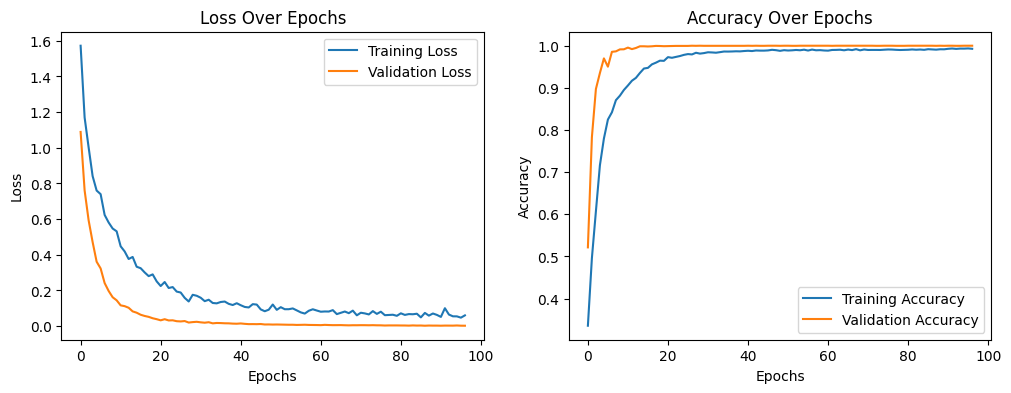

In [27]:
# Plotting the history for the last fold
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

##  Confusion Matrix

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


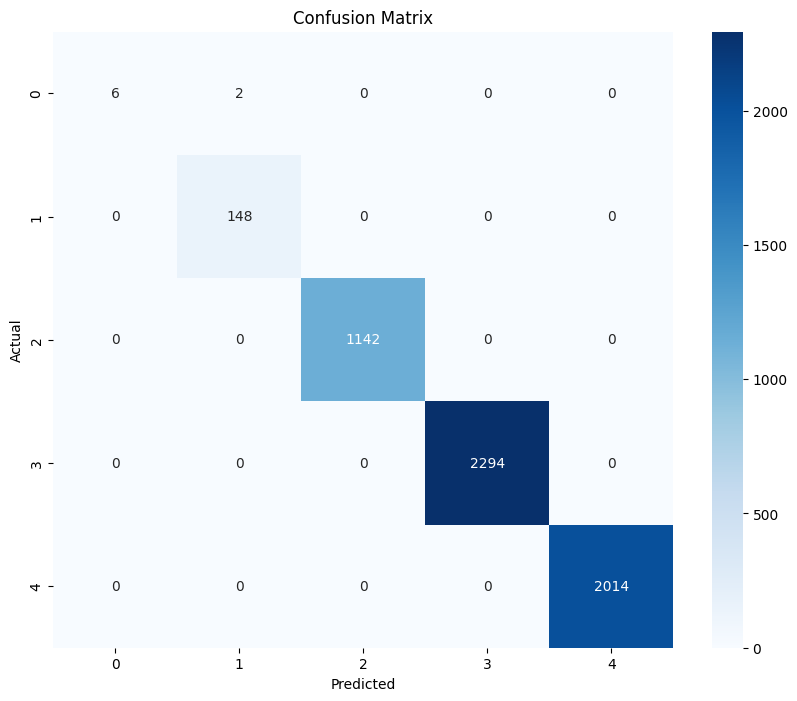

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.99      1.00      0.99       148
           2       1.00      1.00      1.00      1142
           3       1.00      1.00      1.00      2294
           4       1.00      1.00      1.00      2014

    accuracy                           1.00      5606
   macro avg       1.00      0.95      0.97      5606
weighted avg       1.00      1.00      1.00      5606



In [28]:
# Predict the classes for the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true_classes, y_pred_classes))


## Input layer - Prediction

In [3]:
model = load_model('mental_health_model.h5')

# Min and max values for scaling
min_max_values = {
    'GEN_005': (0, 5),
    'GEN_015': (0, 5),
    'GEN_020': (0, 5),
    'GEN_025': (0, 5),
    'GENDVHDI': (0, 5),
    'GEN_010': (0, 10),
    'GEN_030': (0, 5),
    'ALC_015': (0, 10),
    'ALC_020': (0, 10),
    'ALW_005': (0, 10),
    'ALWDVWKY': (0, 1000),
    'ALWDVDLY': (0, 1000),
    'ALWDVLTR': (0, 10),
    'ALWDVSTR': (0, 10),
    'DRGDVYA': (0, 10),
    'DHH_SEX': (1, 2),
    'DHHGAGE': (1, 5),
    'DHHGMS': (1, 5),
    'DHHDGHSZ': (1, 10),
    'DOALW': (0, 10)
}

## Normalize input data

In [4]:
def normalize_input(input_data, min_max_values):
    normalized_data = {}
    for feature, value in input_data.items():
        min_val, max_val = min_max_values[feature]
        normalized_data[feature] = (value - min_val) / (max_val - min_val)
    return normalized_data

## Map Prediction to Category

In [45]:
# Function to map the predicted value to the corresponding category
def map_prediction_to_category(prediction):
    categories = {
        0: 'Poor',
        1: 'Fair',
        2: 'Good',
        3: 'Very good',
        4: 'Excellent',
        9: 'Not stated'
    }
    # Find the index of the maximum value in the prediction
    max_index = prediction.argmax()
    return categories.get(max_index, 'Unknown')

## User Input Handling

In [46]:
# Function to take input data and make predictions
def predict_mental_health(input_data):
    # Normalize the input data
    normalized_data = normalize_input(input_data, min_max_values)
    
    # Ensure the input data is in the correct format
    input_df = pd.DataFrame(normalized_data, index=[0])
    
    # Use the loaded model to make predictions
    prediction = model.predict(input_df)
    
    return prediction

# Function to get user input for all features
def get_user_input():
    user_input = {}
    user_input['GEN_005'] = float(input('Enter GEN_005: '))
    user_input['GEN_015'] = float(input('Enter GEN_015: '))
    user_input['GEN_020'] = float(input('Enter GEN_020: '))
    user_input['GEN_025'] = float(input('Enter GEN_025: '))
    user_input['GENDVHDI'] = float(input('Enter GENDVHDI: '))
    user_input['GEN_010'] = float(input('Enter GEN_010: '))
    user_input['GEN_030'] = float(input('Enter GEN_030: '))
    user_input['ALC_015'] = float(input('Enter ALC_015: '))
    user_input['ALC_020'] = float(input('Enter ALC_020: '))
    user_input['ALW_005'] = float(input('Enter ALW_005: '))
    user_input['ALWDVWKY'] = float(input('Enter ALWDVWKY: '))
    user_input['ALWDVDLY'] = float(input('Enter ALWDVDLY: '))
    user_input['ALWDVLTR'] = float(input('Enter ALWDVLTR: '))
    user_input['ALWDVSTR'] = float(input('Enter ALWDVSTR: '))
    user_input['DRGDVYA'] = float(input('Enter DRGDVYA: '))
    user_input['DHH_SEX'] = float(input('Enter DHH_SEX: '))
    user_input['DHHGAGE'] = float(input('Enter DHHGAGE: '))
    user_input['DHHGMS'] = float(input('Enter DHHGMS: '))
    user_input['DHHDGHSZ'] = float(input('Enter DHHDGHSZ: '))
    user_input['DOALW'] = float(input('Enter DOALW: '))  
    return user_input

# Get user input
user_input = get_user_input()

# Make a prediction
prediction = predict_mental_health(user_input)

# Assuming GENDVMHI is the first output, extract the first element from the prediction
gendvmhi_category = map_prediction_to_category(prediction[0])
print(f'Predicted GENDVMHI: {gendvmhi_category}')

Enter GEN_005:  4
Enter GEN_015:  3
Enter GEN_020:  4
Enter GEN_025:  6
Enter GENDVHDI:  2
Enter GEN_010:  10
Enter GEN_030:  3
Enter ALC_015:  5
Enter ALC_020:  2
Enter ALW_005:  6
Enter ALWDVWKY:  996
Enter ALWDVDLY:  0
Enter ALWDVLTR:  6
Enter ALWDVSTR:  2
Enter DRGDVYA:  6
Enter DHH_SEX:  2
Enter DHHGAGE:  5
Enter DHHGMS:  1
Enter DHHDGHSZ:  2
Enter DOALW:  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted GENDVMHI: Good
